In [1]:
#Nessesary Libraries Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

pd.pandas.set_option ('display.max_columns',None)

In [2]:
#Read the dataset in Pandas DataFrame 
df1=pd.read_excel(r'datasets_140442_330428_Data_Train.xlsx')

In [3]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Fuction to see the summary of the data
def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [5]:
#Lest See the summary 
summary_table(df1)

Dataset Shape: (10683, 11)


,Name,dtypes,Missing Values,Uniques Values
0,Airline,object,0,12
1,Date_of_Journey,object,0,44
2,Source,object,0,5
3,Destination,object,0,6
4,Route,object,1,128
5,Dep_Time,object,0,222
6,Arrival_Time,object,0,1343
7,Duration,object,0,368
8,Total_Stops,object,1,5
9,Additional_Info,object,0,10


####Observations from Summary
1. All The fatures are of Object data type. We need to fix few datatypes. 
2. There are almost no missing values. 

In [6]:
df1.dropna(inplace=True)

In [7]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
#Lest explore each feature
df1.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [9]:
df1.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [10]:
df1.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [11]:
df1.Route.value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → JAI → DEL → HYD             1
BLR → HBX → BOM → BHO → DEL       1
BLR → BOM → IXC → DEL             1
BOM → RPR → VTZ → HYD             1
BOM → GOI → HYD                   1
Name: Route, Length: 128, dtype: int64

In [12]:
df1.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [13]:
df1.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

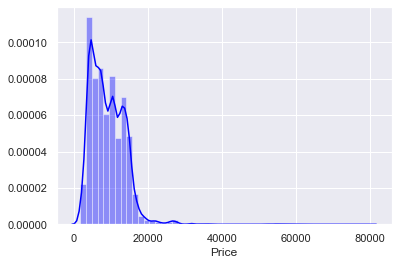

In [14]:
#Lets Explore the Target
sns.distplot(df1["Price"], color="blue",kde=True) #Lets see the distribusion curve

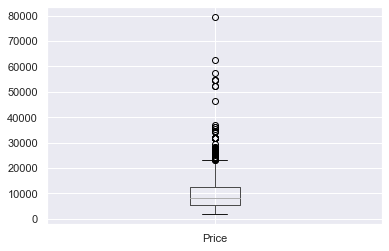

In [15]:
#Now Lets check the Outliers
df1.boxplot(column="Price") #Lets See the extream values in out Target Varibale using box plot  
plt.show()

In [16]:
df1['Price'].describe()# Lets check the stats of Price 

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [17]:
Q1=df1['Price'].quantile(0.25)
Q3=df1['Price'].quantile(0.75)
Q1,Q3

(5277.0, 12373.0)

In [18]:
IQR=Q3-Q1
IQR

7096.0

In [19]:
#Lets check the lower and upper limits 
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-5367.0, 23017.0)

In [20]:
#Lets see how many data points falling outside of upper limit
df1[df1['Price']>upper_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [21]:
#About 79% of the data in Additional_Info feature has a catogory as 'No info'. 
#So basically its not giving any valuable output. So we can simply drop this feature.
df1.drop('Additional_Info',axis=1,inplace=True)

In [22]:
#Also the Route Feature and Total_Stops giving the same information. So we ould simply drop Route feature as well.
df1.drop('Route',axis=1,inplace=True)

In [23]:
df1.head()
#Now we are left with 8 Features and One Target.

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [24]:
# Date_of_Journey, Dep_Time, Arrival_Time and Duration are actually Datetime Features but listed as Object datatype. 
# Lest extract the meaningfull info out of these features and convert it into Datatime from Object. 

# From Date_of_Journey, we could take out Day and Month.
# Also will append these extracted features in our dataset as seperate columns.

df1['Journey_Day']= pd.to_datetime(df1.Date_of_Journey, format='%d/%m/%Y').dt.day
df1['Journey_Month']= pd.to_datetime(df1.Date_of_Journey, format='%d/%m/%Y').dt.month

In [25]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [26]:
# Since we have appended the extracted features from Date_of_Journey, we no longer need the original feature.
df1.drop('Date_of_Journey',axis=1,inplace=True)

In [27]:
df1.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [28]:
#Similarly will have to extract out the Hours and Mins from Dep_Time, Arrival_Time and Duration Feature.
# Also will append these extraxted features in df1.

df1['Dep_Hour']=pd.to_datetime(df1.Dep_Time).dt.hour
df1['Dep_Min']=pd.to_datetime(df1.Dep_Time).dt.minute

In [29]:
df1.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50


In [30]:
# Since we have appended the extracted features from Dept_Time, we no longer need the original feature.
df1.drop('Dep_Time',axis=1,inplace=True)

In [31]:
#Lets perform similar steps from Arrival_Time. 
#It also include day and month in few rows, but we don't need that info, since we already captured that info in other feature.

df1['Arival_Hour']=pd.to_datetime(df1.Arrival_Time).dt.hour
df1['Arival_Min']=pd.to_datetime(df1.Arrival_Time).dt.minute

In [32]:
# Since we have appended the extracted features from Arrival_Time, we no longer need the original feature.
df1.drop('Arrival_Time',axis=1,inplace=True)

In [33]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arival_Hour,Arival_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [34]:
# Now we are left with Duration Feature. its in the format of HH:MM but in some rows, only Hour or Min is present.
# So will have to take care of it. 
# It is a basically a differnce between Departure Time and Arrival time.


# Lets convert Duration column into list
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [35]:
# Appending duration_hours and duration_mins list to df1

df1["Duration_hours"] = duration_hours
df1["Duration_mins"] = duration_mins

In [36]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arival_Hour,Arival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45


In [37]:
#Lest drop the original Duration Column from df1
df1.drop('Duration',axis=1,inplace=True)

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  object
 4   Price           10682 non-null  int64 
 5   Journey_Day     10682 non-null  int64 
 6   Journey_Month   10682 non-null  int64 
 7   Dep_Hour        10682 non-null  int64 
 8   Dep_Min         10682 non-null  int64 
 9   Arival_Hour     10682 non-null  int64 
 10  Arival_Min      10682 non-null  int64 
 11  Duration_hours  10682 non-null  int64 
 12  Duration_mins   10682 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [39]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arival_Hour,Arival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


##Since we have taken care of all the datetime features, lets focus now on Catogorical features. Will have to encode them.

1.Lable Encoding  for ordinal Features
2.Onehot encoding for Nominal Features. 

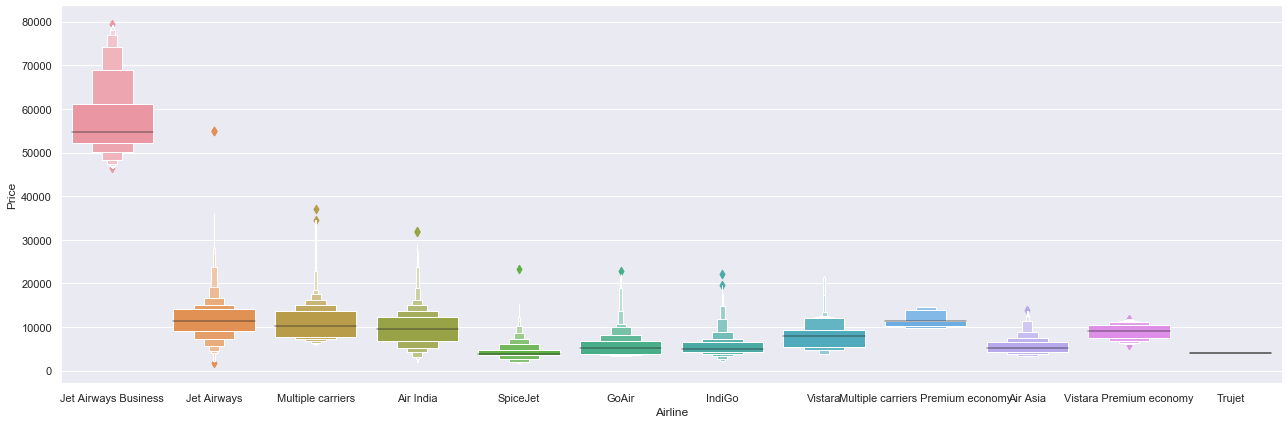

In [40]:
# Now lets discover each catogorical feature and its relationship with Target-Price. 
# Relation of Airlinetype with Price using Catplot.

sns.catplot(y = "Price", x = "Airline", data = df1.sort_values("Price", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

# So From the below catplot, we could see that for the Jet Airways, the price is at higher side. 
# While for the rest of the airlines, it almost same price.
# Airline is basically Nominal Feature so will use One-Hot encoding for this. 

In [41]:
Airline = df1[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


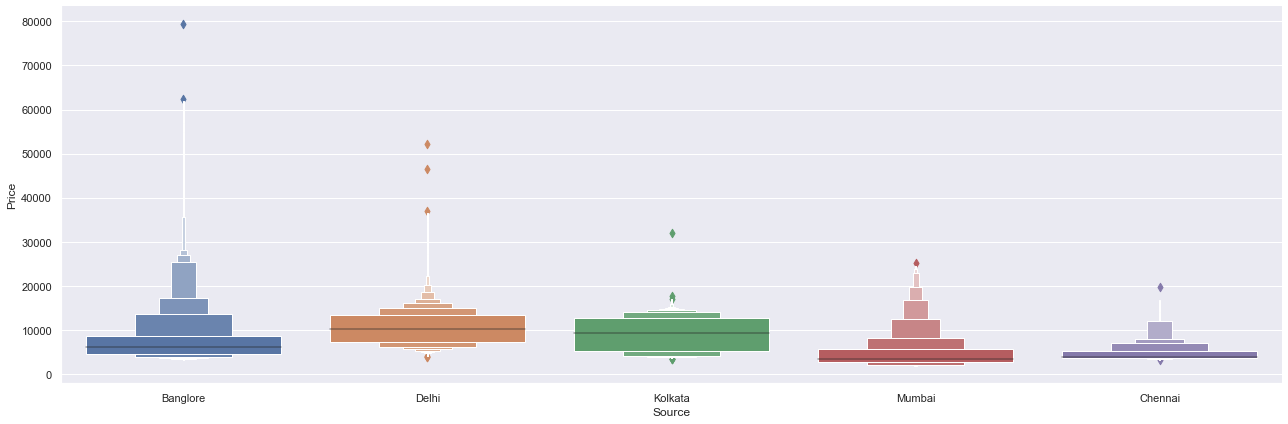

In [42]:
# Relation of Source with Price using Catplot.

sns.catplot(y = "Price", x = "Source", data = df1.sort_values("Price", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

#Nominal Feature. will use One-hot encoding.

In [43]:
Source= df1[['Source']]
Source= pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


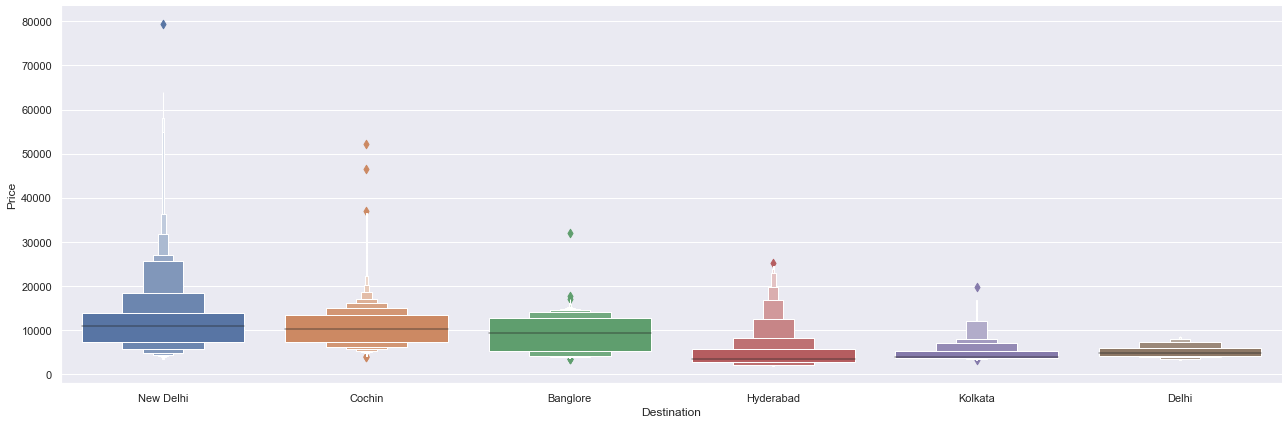

In [44]:
# Relation of Destination with Price using Catplot.

sns.catplot(y = "Price", x = "Destination", data = df1.sort_values("Price", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

#Nominal Feature. will use One-hot encoding. 

In [45]:
Destination=df1[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


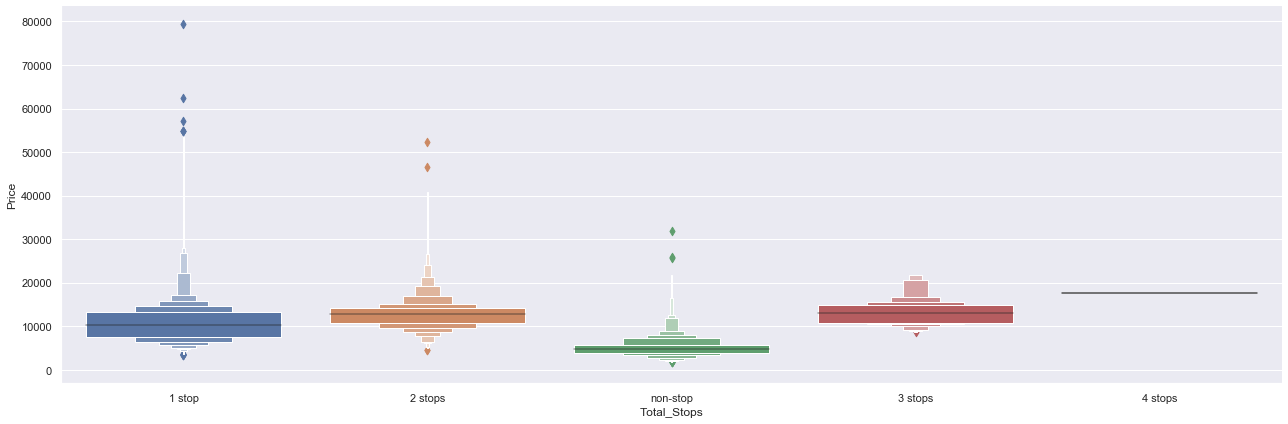

In [46]:
# Relation of Total_Stops and Price using Catplot.

sns.catplot(y = "Price", x = "Total_Stops", data = df1.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# If we could carefully observe, there is pattern in this feature. As Number of stops increases, the price increases. 
# Non-stop has lowest price and then there is increment as we go on till 4 stops. 
# So We could conclude that,Total_Stops is an Ordinal feature. So will use Label Encoding for this. 

In [47]:
encode={"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}
df1.replace(encode, inplace = True)

In [48]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arival_Hour,Arival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [49]:
#Now lets concat each converted feature with df1. .

data_train= pd.concat([df1,Airline,Source,Destination],axis=1)

In [50]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arival_Hour,Arival_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
# Lets drop the original features. 
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [52]:
data_train.head() #Now Our Training Data is ready. 

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arival_Hour,Arival_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Test Data Pre-Prosessing

In [53]:
#Now in the same way, we have to perform Feature Engineering on Test data
df2=pd.read_excel(r'datasets_140442_330428_Test_set.xlsx')

In [54]:
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [55]:
summary_table(df2)

#There are no missing values in test data

Dataset Shape: (2671, 10)


,Name,dtypes,Missing Values,Uniques Values
0,Airline,object,0,11
1,Date_of_Journey,object,0,44
2,Source,object,0,5
3,Destination,object,0,6
4,Route,object,0,100
5,Dep_Time,object,0,199
6,Arrival_Time,object,0,704
7,Duration,object,0,320
8,Total_Stops,object,0,5
9,Additional_Info,object,0,6


In [56]:
# Feature Enginnering

# Date_of_Journey
df2["Journey_Day"] = pd.to_datetime(df2.Date_of_Journey, format="%d/%m/%Y").dt.day
df2["Journey_Month"] = pd.to_datetime(df2["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df2.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
df2["Dep_Hour"] = pd.to_datetime(df2["Dep_Time"]).dt.hour
df2["Dep_Min"] = pd.to_datetime(df2["Dep_Time"]).dt.minute
df2.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df2["Arrival_Hour"] = pd.to_datetime(df2.Arrival_Time).dt.hour
df2["Arrival_Min"] = pd.to_datetime(df2.Arrival_Time).dt.minute
df2.drop(["Arrival_Time"], axis = 1, inplace = True)

In [57]:
# Duration
duration = list(df2["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
df2["Duration_hours"] = duration_hours
df2["Duration_mins"] = duration_mins
df2.drop(["Duration"], axis = 1, inplace = True)

In [58]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df2.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [59]:
# Categorical data

print("Airline")
print("-"*75)
print(df2["Airline"].value_counts())
Airline = pd.get_dummies(df2[["Airline"]], drop_first= True)

print()

print("Source")
print("-"*75)
print(df2["Source"].value_counts())
Source = pd.get_dummies(df2[["Source"]], drop_first= True)

print()

print("Destination")
print("-"*75)
print(df2["Destination"].value_counts())
Destination = pd.get_dummies(df2[["Destination"]], drop_first = True)

# Replacing Total_Stops
df2.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> df2 + Airline + Source + Destination
data_test = pd.concat([df2, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


Shape of t

In [60]:
data_test.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Model Building 

Random Forest

In [61]:
#Lets import Random Forest 
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [62]:
#Lets define X and Y
x=data_train.drop("Price",axis=1)
y=data_train["Price"]

In [63]:
x.shape

(10682, 29)

In [64]:
#Splitting the data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.3,random_state=100)

In [65]:
x_train.shape

(7477, 29)

In [66]:
x_test.shape

(3205, 29)

In [67]:
#Lets fit the data to model 
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
#Predictions
pred=rf.predict(x_test)

In [69]:
#Score On training Data
rf.score(x_train,y_train)

0.9566668592749614

In [70]:
#Score On testing Data
rf.score(x_test,y_test)

0.8171960883816589

In [71]:
#Evalutation metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [72]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [73]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 1956.5298520413778
MAE: 1199.667624273499
r_square: 0.8171960883816589


In [74]:
#Lets Check the Feaure Importance 
importances=rf.feature_importances_

for feature in zip (x.columns, importances):
    print (feature)

('Total_Stops', 0.03316555385854683)
('Journey_Day', 0.1496399124685614)
('Journey_Month', 0.051039286158818205)
('Dep_Hour', 0.029368282835869175)
('Dep_Min', 0.02298798056370256)
('Arival_Hour', 0.03715203348616598)
('Arival_Min', 0.019135691430298325)
('Duration_hours', 0.4339664813385926)
('Duration_mins', 0.01946443594427015)
('Airline_Air India', 0.005344651305005962)
('Airline_GoAir', 0.0017486984136150861)
('Airline_IndiGo', 0.005983396369187898)
('Airline_Jet Airways', 0.06543862535240914)
('Airline_Jet Airways Business', 0.0530008341684036)
('Airline_Multiple carriers', 0.019327255001482024)
('Airline_Multiple carriers Premium economy', 0.0006522803718696957)
('Airline_SpiceJet', 0.002485282678849217)
('Airline_Trujet', 4.988172561171287e-06)
('Airline_Vistara', 0.0030873189151704276)
('Airline_Vistara Premium economy', 2.7628635154082887e-05)
('Source_Chennai', 0.0006193234004608458)
('Source_Delhi', 0.002368470103773385)
('Source_Kolkata', 0.0029472352478143913)
('Source_Mu

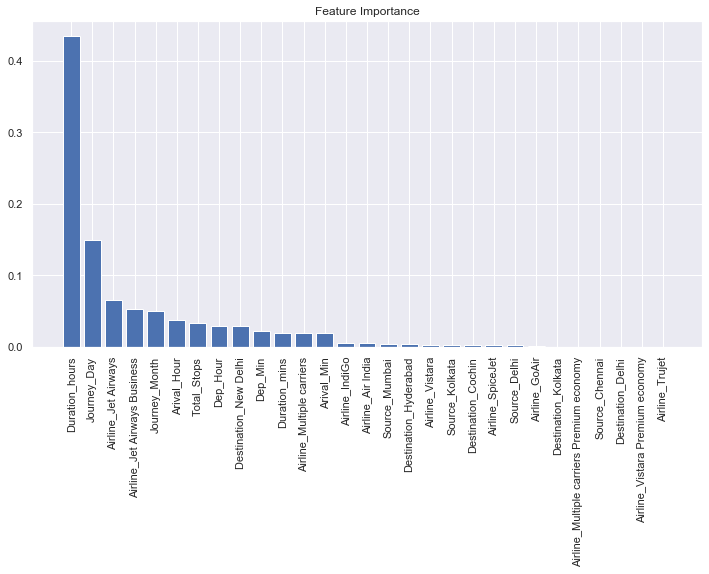

In [75]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()

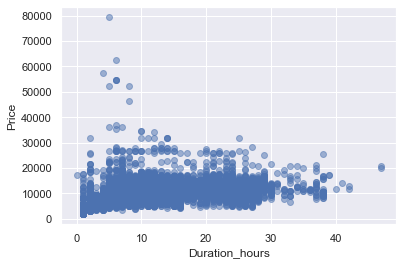

In [76]:
#From Feature importance gharph, Duration hours is the most significant feature. Lets see the relation with Price
#Lets plot a scatter for Actual Vs Predicted
plt.scatter(data_train.Duration_hours, data_train.Price, alpha = 0.5)
plt.xlabel("Duration_hours")
plt.ylabel("Price")
plt.show()

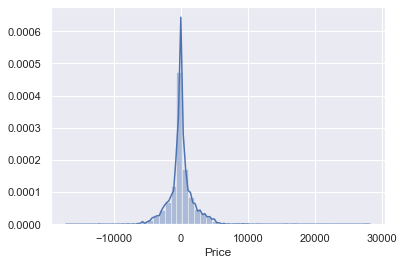

In [77]:
#Lets plot the error destribustion
sns.distplot(y_test-pred)
plt.show()

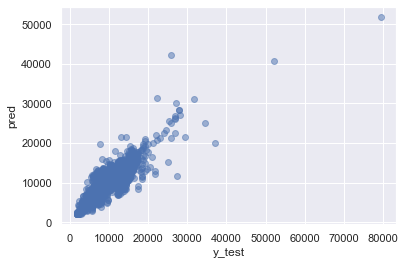

In [78]:
#Lets plot a scatter for Actual Vs Predicted
plt.scatter(y_test, pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred")
plt.show()

# Hyperparameter Tuning

In [79]:
# We are going to use RandomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV

In [80]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [81]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [82]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [245]:
#Fit the data
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [246]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [247]:
random_pred= rf_random.predict(x_test)

In [248]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, random_pred))
MAE = mean_absolute_error(y_test, random_pred)
r_squre= r2_score(y_test, random_pred)

In [249]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 1855.9839300356475
MAE: 1176.1164095138206
r_square: 0.8355018756259418


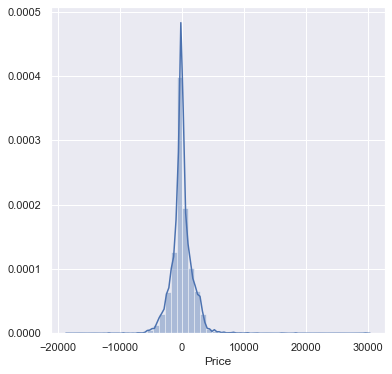

In [251]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-random_pred)
plt.shbow()

# Gradient Boosting

In [83]:
#Lest Try Gradient boosting 
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()

In [84]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
gb_pred=gb.predict(x_test)

In [86]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, gb_pred))
MAE = mean_absolute_error(y_test, gb_pred)
r_squre= r2_score(y_test, gb_pred)

In [87]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 2106.713493514713
MAE: 1517.301902459573
r_square: 0.7880548508791339


In [88]:
#Hyperparameter Tuning 
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
#Loss function
loss = ['ls', 'lad', 'huber']
#Criteria
criterion =['mse','friedman_mse']

In [89]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               
                'loss':loss,
               'criterion':criterion
              
              }

In [90]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [91]:
gb_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  40.9s
[CV] n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.8s remaining:    0.0s


[CV]  n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  44.1s
[CV] n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  41.7s
[CV] n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  42.7s
[CV] n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  40.4s
[CV] n_estimators=100, max_features=auto, max_depth=4, loss=lad, criterion=friedman_mse 
[CV]  n_estimators=100, max_features=auto, max_depth=4, loss=lad, criterion=friedman_mse, total=   2.3s
[CV] n_estimators=100, max_features=auto, max_depth=4, loss=lad, criterion=friedman_mse 
[CV]  n_estimators=10

[CV]  n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  26.2s
[CV] n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  26.0s
[CV] n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  24.9s
[CV] n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  24.6s
[CV] n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  25.1s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [92]:
gb_random.best_params_

{'n_estimators': 600,
 'max_features': 'sqrt',
 'max_depth': 5,
 'loss': 'huber',
 'criterion': 'friedman_mse'}

In [111]:
gb_pred=gb_random.predict(x_test)

In [112]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, gb_pred))
MAE = mean_absolute_error(y_test, gb_pred)
r_squre= r2_score(y_test, gb_pred)

In [113]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 1733.1065204574757
MAE: 1148.0008844122665
r_square: 0.8565623901880849


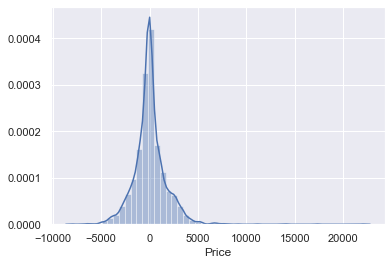

In [114]:
#Lets plot the error destribustion
sns.distplot(y_test-gb_pred)
plt.show()

# Catboost

In [99]:
#Lest try Catboost algorithum
from catboost import CatBoostRegressor
cr=CatBoostRegressor(iterations=200, loss_function='RMSE',
                              random_state = 2021, 
                              eval_metric="RMSE")

In [100]:
cr.fit(x_train,y_train)

Learning rate set to 0.189732
0:	learn: 4165.0243218	total: 512ms	remaining: 1m 41s
1:	learn: 3751.1192031	total: 520ms	remaining: 51.4s
2:	learn: 3468.7456529	total: 527ms	remaining: 34.6s
3:	learn: 3215.5531975	total: 536ms	remaining: 26.3s
4:	learn: 3063.2020461	total: 543ms	remaining: 21.2s
5:	learn: 2895.0345382	total: 548ms	remaining: 17.7s
6:	learn: 2809.5218184	total: 553ms	remaining: 15.2s
7:	learn: 2731.3405480	total: 557ms	remaining: 13.4s
8:	learn: 2661.8280030	total: 561ms	remaining: 11.9s
9:	learn: 2589.6978959	total: 565ms	remaining: 10.7s
10:	learn: 2558.0127706	total: 570ms	remaining: 9.79s
11:	learn: 2525.7291971	total: 574ms	remaining: 8.99s
12:	learn: 2471.7738085	total: 578ms	remaining: 8.31s
13:	learn: 2449.1748437	total: 583ms	remaining: 7.75s
14:	learn: 2423.5631650	total: 587ms	remaining: 7.24s
15:	learn: 2406.7699932	total: 591ms	remaining: 6.8s
16:	learn: 2388.3318126	total: 595ms	remaining: 6.41s
17:	learn: 2366.7155330	total: 603ms	remaining: 6.1s
18:	learn

185:	learn: 1529.2588564	total: 1.32s	remaining: 99.8ms
186:	learn: 1527.5263175	total: 1.33s	remaining: 92.4ms
187:	learn: 1526.0953241	total: 1.33s	remaining: 85.1ms
188:	learn: 1524.2557342	total: 1.34s	remaining: 77.9ms
189:	learn: 1521.4706765	total: 1.34s	remaining: 70.6ms
190:	learn: 1519.1381578	total: 1.35s	remaining: 63.5ms
191:	learn: 1517.4032838	total: 1.35s	remaining: 56.3ms
192:	learn: 1516.8756668	total: 1.35s	remaining: 49.1ms
193:	learn: 1513.5084587	total: 1.36s	remaining: 42ms
194:	learn: 1511.2870503	total: 1.36s	remaining: 35ms
195:	learn: 1509.5180620	total: 1.37s	remaining: 27.9ms
196:	learn: 1507.8562707	total: 1.37s	remaining: 20.9ms
197:	learn: 1504.7936493	total: 1.38s	remaining: 13.9ms
198:	learn: 1503.0829419	total: 1.38s	remaining: 6.94ms
199:	learn: 1500.8768922	total: 1.39s	remaining: 0us


In [101]:
# Lets do predictions on out test data
cr_pred=cr.predict(x_test)

In [102]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, cr_pred))
MAE = mean_absolute_error(y_test, cr_pred)
r_squre= r2_score(y_test, cr_pred)

In [103]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 1801.7037052886353
MAE: 1244.5162631589844
r_square: 0.8449830204109313


In [104]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

cr1=CatBoostRegressor()
parameters = {
                'iterations': [100,200,300,400,500],
                'loss_function': ['MAE', 'RMSE'],
                
               
}

cv = GridSearchCV(cr1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   44.7s finished


Learning rate set to 0.09456
0:	learn: 4371.3212449	total: 3.95ms	remaining: 1.97s
1:	learn: 4183.7451496	total: 7.57ms	remaining: 1.89s
2:	learn: 3963.7715696	total: 11.2ms	remaining: 1.85s
3:	learn: 3808.1160539	total: 15.6ms	remaining: 1.94s
4:	learn: 3651.6523821	total: 19.2ms	remaining: 1.91s
5:	learn: 3496.9323028	total: 25.9ms	remaining: 2.13s
6:	learn: 3350.5429445	total: 31.3ms	remaining: 2.21s
7:	learn: 3241.5947904	total: 36.8ms	remaining: 2.26s
8:	learn: 3161.0880040	total: 41.9ms	remaining: 2.28s
9:	learn: 3071.8659242	total: 46.6ms	remaining: 2.28s
10:	learn: 2986.5850691	total: 50.8ms	remaining: 2.26s
11:	learn: 2928.1618182	total: 55.4ms	remaining: 2.25s
12:	learn: 2875.7037166	total: 60.3ms	remaining: 2.26s
13:	learn: 2814.6376650	total: 65.1ms	remaining: 2.26s
14:	learn: 2761.7771773	total: 69.4ms	remaining: 2.24s
15:	learn: 2711.9386735	total: 74ms	remaining: 2.24s
16:	learn: 2668.9008778	total: 78ms	remaining: 2.22s
17:	learn: 2628.9025688	total: 82.5ms	remaining: 2

174:	learn: 1811.0180779	total: 815ms	remaining: 1.51s
175:	learn: 1810.7940363	total: 819ms	remaining: 1.51s
176:	learn: 1808.5900556	total: 824ms	remaining: 1.5s
177:	learn: 1806.4609433	total: 829ms	remaining: 1.5s
178:	learn: 1805.9788922	total: 833ms	remaining: 1.49s
179:	learn: 1804.3723979	total: 838ms	remaining: 1.49s
180:	learn: 1804.3172342	total: 842ms	remaining: 1.48s
181:	learn: 1800.4828131	total: 847ms	remaining: 1.48s
182:	learn: 1798.4805609	total: 851ms	remaining: 1.47s
183:	learn: 1794.8367808	total: 855ms	remaining: 1.47s
184:	learn: 1792.0572506	total: 860ms	remaining: 1.46s
185:	learn: 1788.3477521	total: 864ms	remaining: 1.46s
186:	learn: 1785.3112567	total: 869ms	remaining: 1.45s
187:	learn: 1783.5488701	total: 873ms	remaining: 1.45s
188:	learn: 1781.8968461	total: 877ms	remaining: 1.44s
189:	learn: 1780.8843035	total: 881ms	remaining: 1.44s
190:	learn: 1779.5020506	total: 885ms	remaining: 1.43s
191:	learn: 1776.8582194	total: 889ms	remaining: 1.43s
192:	learn: 

334:	learn: 1564.5354590	total: 1.46s	remaining: 721ms
335:	learn: 1563.5777887	total: 1.47s	remaining: 717ms
336:	learn: 1563.0539833	total: 1.47s	remaining: 712ms
337:	learn: 1562.5406975	total: 1.48s	remaining: 708ms
338:	learn: 1562.0228878	total: 1.48s	remaining: 703ms
339:	learn: 1561.3095407	total: 1.49s	remaining: 699ms
340:	learn: 1559.9743044	total: 1.49s	remaining: 695ms
341:	learn: 1559.0311805	total: 1.49s	remaining: 690ms
342:	learn: 1558.1486808	total: 1.5s	remaining: 686ms
343:	learn: 1557.9931897	total: 1.5s	remaining: 681ms
344:	learn: 1556.6856786	total: 1.51s	remaining: 677ms
345:	learn: 1556.1443489	total: 1.51s	remaining: 673ms
346:	learn: 1555.1855274	total: 1.52s	remaining: 669ms
347:	learn: 1554.1887242	total: 1.52s	remaining: 664ms
348:	learn: 1553.3000053	total: 1.52s	remaining: 660ms
349:	learn: 1552.2008866	total: 1.53s	remaining: 655ms
350:	learn: 1551.2931337	total: 1.53s	remaining: 651ms
351:	learn: 1549.9622840	total: 1.54s	remaining: 646ms
352:	learn: 

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x000000001271E2E8>,
             iid='deprecated', n_jobs=-1,
             param_grid={'iterations': [100, 200, 300, 400, 500],
                         'loss_function': ['MAE', 'RMSE']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [106]:
cv.best_params_

{'iterations': 500, 'loss_function': 'RMSE'}

In [115]:
cr1_pred=cv.predict(x_test)

In [116]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, cr1_pred))
MAE = mean_absolute_error(y_test, cr1_pred)
r_squre= r2_score(y_test, cr1_pred)

In [117]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 1754.6848293239455
MAE: 1199.6648147300248
r_square: 0.8529683706915603


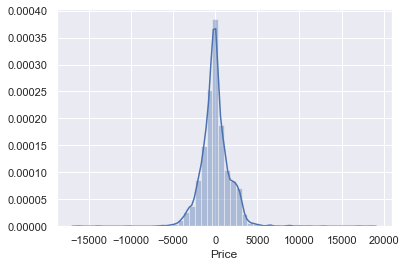

In [118]:
#Lets plot the error destribustion
sns.distplot(y_test-cr1_pred)
plt.show()

# Linear Regression-Stats Model 

In [119]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x_train = sm.add_constant(x_train)
# create a fitted model in one line
lm = sm.OLS(y_train,x_train.astype(float))
lm_result=lm.fit()

In [120]:
# print the coefficients
print(lm_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     467.3
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:20:12   Log-Likelihood:                -70185.
No. Observations:                7477   AIC:                         1.404e+05
Df Residuals:                    7451   BIC:                         1.406e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [121]:
# Making predictions using the model
y_pred_train = lm_result.predict(x_train)
y_pred_test = lm_result.predict(sm.add_constant(x_test))

In [122]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
MAE_train = mean_absolute_error(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [123]:
print('rmse_train :',rmse_train, 'MAE_train', MAE_train)
print('rmse_test :',rmse_test, 'MAE_test', MAE_test)

rmse_train : 2886.762560942401 MAE_train 1979.2487953987022
rmse_test : 2701.7948186986664 MAE_test 1949.3925800086497


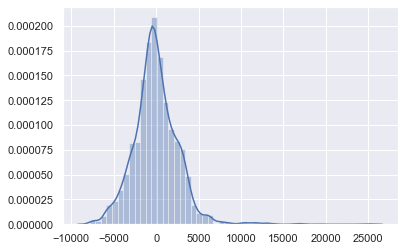

In [124]:
sns.distplot(y_test-y_pred_test)

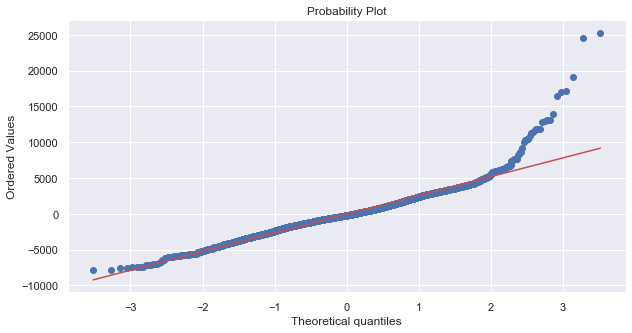

In [125]:
import scipy.stats as stats
import pylab
fig = plt.figure(figsize=(10,5))
stats.probplot(y_test-y_pred_test, dist="norm", plot=pylab)
pylab.show()

By comparing all the above models, we could conclude that, Gradient Boosting (GB) is performing better than the rest of the models. </br>

For GB, we got </br>

RMSE : 1733.1065204574757</br>

MAE: 1148.0008844122665 </br>

r_square: 0.8565623901880849 </br>

So, will save the GB model for out future predictions.

# Save the model-Gradient Boosting Regressor 

In [126]:
import pickle
# open a file
file = open('flightFare_GB.pkl', 'wb')

# dump information to that file
pickle.dump(gb_random, file)

In [127]:
model = open('flightFare_GB.pkl','rb')
GB = pickle.load(model)

In [128]:
y_Final_prediction = GB.predict(x_test)

In [130]:
r2_score(y_test, y_Final_prediction)

0.8565623901880849